Estimated coefficients:
b_0 = 1.2363636363636363            
b_1 = 1.1696969696969697


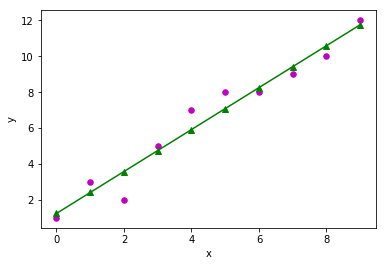

In [4]:
#https://www.geeksforgeeks.org/linear-regression-python-implementation/

import numpy as np
import matplotlib.pyplot as plt
 
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
 
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)
 
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = b[0] + b[1]*x
    print(y_pred)
    # plotting the regression line
    plt.plot(x, y_pred, marker='^', color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()
 
 def main():
    # observations / data
    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
 
    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
    # plotting regression line
    plot_regression_line(x, y, b)
 
 if __name__ == "__main__":
    main()

Coefficients:  [-8.80740828e-02  6.72507352e-02  5.10280463e-02  2.18879172e+00
 -1.72283734e+01  3.62985243e+00  2.13933641e-03 -1.36531300e+00
  2.88788067e-01 -1.22618657e-02 -8.36014969e-01  9.53058061e-03
 -5.05036163e-01]
Variance score: 0.7208987846108866


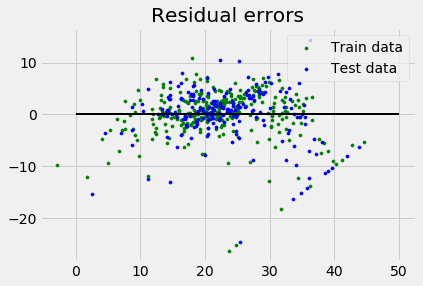

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# load the boston dataset
boston = datasets.load_boston(return_X_y=False)
 
# defining feature matrix(X) and response vector(y)
X = boston.data
y = boston.target
 
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()